# Load pretrained model

In [30]:
from pathlib import Path

import pytorch_lightning as pl

import pmldiku
from pmldiku import data, vae, model_utils

%load_ext autoreload
%autoreload 1
%aimport pmldiku.data, pmldiku.vae, pmldiku.model_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
trained_models = model_utils.show_trained_models()
trained_models

Model mnist-CVAE-MSE-epoch=24-val_loss=4918.31.ckpt; size 1.18 mb.
Model mnist-VAE-BCE-epoch=34-val_loss=18057.60.ckpt; size 8.53 mb.
Model mnist-VAE-MSE-epoch=21-val_loss=18096.77.ckpt; size 8.53 mb.
Model mnist-VAE-MSE-epoch=15-val_loss=4599.13.ckpt; size 8.53 mb.


TrainedModels(models={'mnist-CVAE-MSE-epoch=24-val_loss=4918.31.ckpt': PosixPath('/scratch/fjr906/projects/pml/pmldiku-exam-paper/code/models/mnist-CVAE-MSE-epoch=24-val_loss=4918.31.ckpt'), 'mnist-VAE-BCE-epoch=34-val_loss=18057.60.ckpt': PosixPath('/scratch/fjr906/projects/pml/pmldiku-exam-paper/code/models/mnist-VAE-BCE-epoch=34-val_loss=18057.60.ckpt'), 'mnist-VAE-MSE-epoch=21-val_loss=18096.77.ckpt': PosixPath('/scratch/fjr906/projects/pml/pmldiku-exam-paper/code/models/mnist-VAE-MSE-epoch=21-val_loss=18096.77.ckpt'), 'mnist-VAE-MSE-epoch=15-val_loss=4599.13.ckpt': PosixPath('/scratch/fjr906/projects/pml/pmldiku-exam-paper/code/models/mnist-VAE-MSE-epoch=15-val_loss=4599.13.ckpt')})

In [34]:
base_vae = vae.BaseVAE()
model = vae.LitVAE.load_from_checkpoint(trained_models.models["mnist-VAE-BCE-epoch=34-val_loss=18057.60.ckpt"], vae=base_vae)
model

LitVAE(
  (vae): BaseVAE(
    (fc1): Linear(in_features=784, out_features=400, bias=True)
    (fc1a): Linear(in_features=400, out_features=100, bias=True)
    (fc21): Linear(in_features=100, out_features=2, bias=True)
    (fc22): Linear(in_features=100, out_features=2, bias=True)
    (fc3): Linear(in_features=2, out_features=100, bias=True)
    (fc3a): Linear(in_features=100, out_features=400, bias=True)
    (fc4): Linear(in_features=400, out_features=784, bias=True)
  )
)

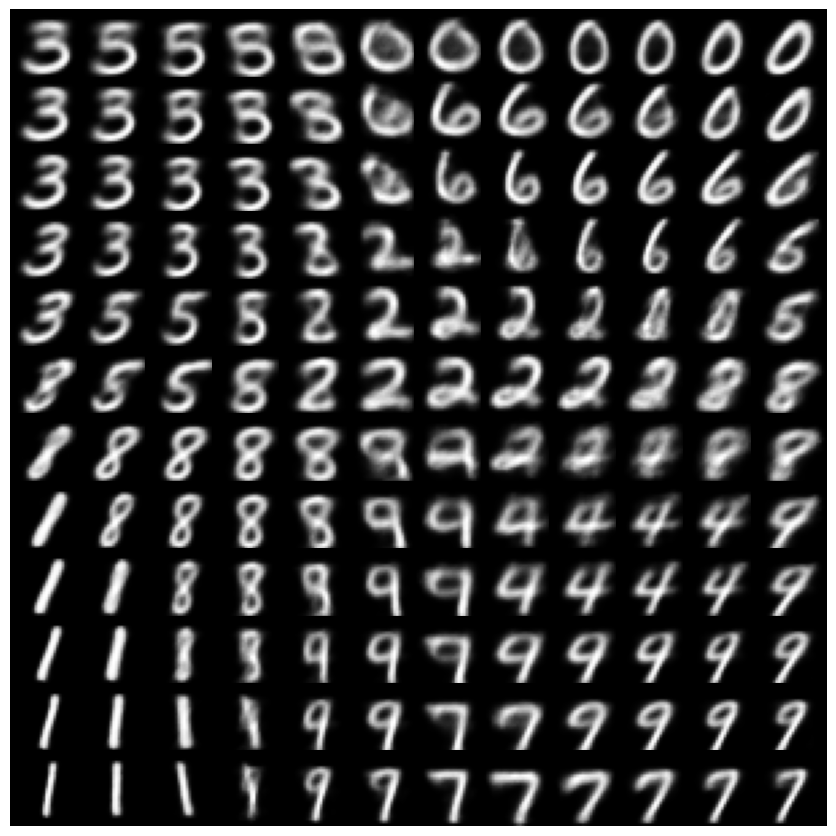

In [12]:
gauss_vals = model_utils.construct_gauss_grid(M=12)
decoded_imgs = model.vae.decode(gauss_vals).detach().numpy()
model_utils.plot_gauss_grid_imgs(decoded_imgs)